In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from algo_implementation import logistic_regression

In [57]:
def generate_data_scheme(mean, variance):
    y = np.random.binomial(1, 0.5, 1000)
    X = np.zeros(shape=(1000, 2))
    X[y == 0] = np.random.multivariate_normal(mean=[0, 0], cov=[[1, variance], [variance, 1]], size=y[y == 0].size)
    X[y == 1] = np.random.multivariate_normal(mean=[mean, mean], cov=[[1, variance], [variance, 1]], size=y[y == 1].size)

    X_train, X_test = X[:700], X[700:]
    y_train, y_test = y[:700], y[700:]
    
    return X_train, X_test, y_train, y_test

In [58]:
X_train, X_test, y_train, y_test = generate_data_scheme(4, 2)
x0_min, x0_max = X_train[:, 0].min(), X_train[:, 0].max()
x1_min, x1_max = X_train[:, 1].min(), X_train[:, 1].max()
x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, 0.01),
                     np.arange(x1_min, x1_max, 0.01))


C:\Users\jan20\AppData\Local\Temp\ipykernel_1652\3040761761.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  X[y == 0] = np.random.multivariate_normal(mean=[0, 0], cov=[[1, variance], [variance, 1]], size=y[y == 0].size)
C:\Users\jan20\AppData\Local\Temp\ipykernel_1652\3040761761.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  X[y == 1] = np.random.multivariate_normal(mean=[mean, mean], cov=[[1, variance], [variance, 1]], size=y[y == 1].size)


In [59]:
model = logistic_regression()
model.fit(X_train, y_train)
print(model.accuracy(X_test, y_test))
print(model.beta)

X = np.c_[x0.ravel(), x1.ravel()]

irls_areas = model.predict(X)
irls_areas = irls_areas.reshape(x0.shape)

(700, 3)
(3,)
0.94
[-5.70002189  1.69436753  1.16123633]


In [60]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model2.intercept_, model2.coef_

Accuracy: 0.94


(array([-5.49239741]), array([[1.62355902, 1.12870478]]))

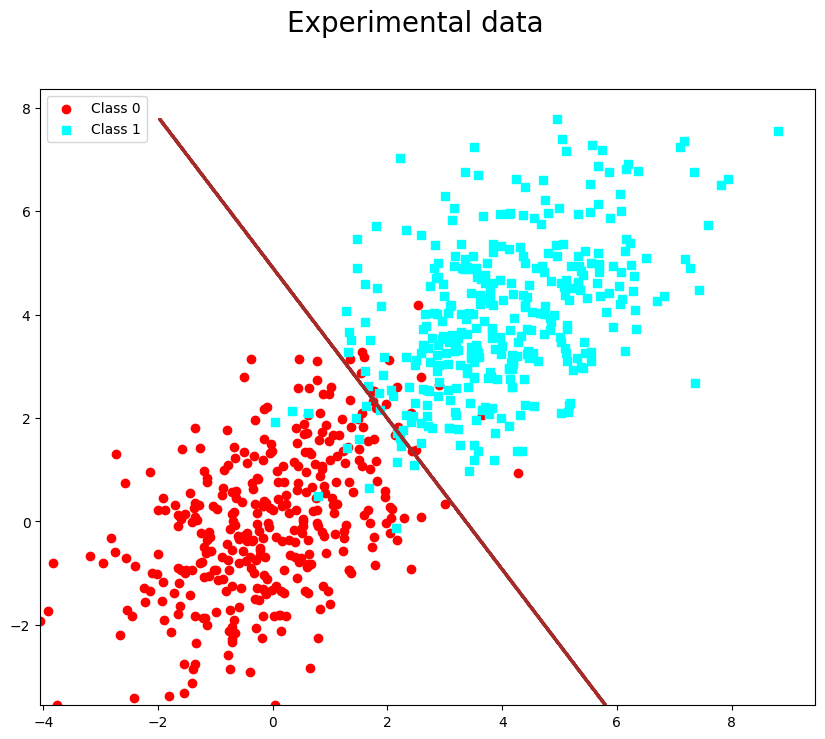

In [61]:
markers = ['o', 's']
colors = ['red', 'cyan']
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Experimental data", fontsize=20)
plt.contour(x0, x1, irls_areas, colors='brown', linewidths=2)
for i in range(2):
    plt.scatter(X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], marker=markers[i], label=f'Class {i}', color=colors[i])
plt.legend()
plt.show()

In [2]:
# generate random binary data from sklearn  
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from algo_implementation import logistic_regression

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = logistic_regression()
model.fit(X_train, y_train)
print(model.accuracy(X_test, y_test))
print(model.beta)

model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


(700, 3)
(3,)
0.9966666666666667
[-2.84487348 11.53024982 -5.47769399]
Accuracy: 0.9966666666666667


In [5]:
X


array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])